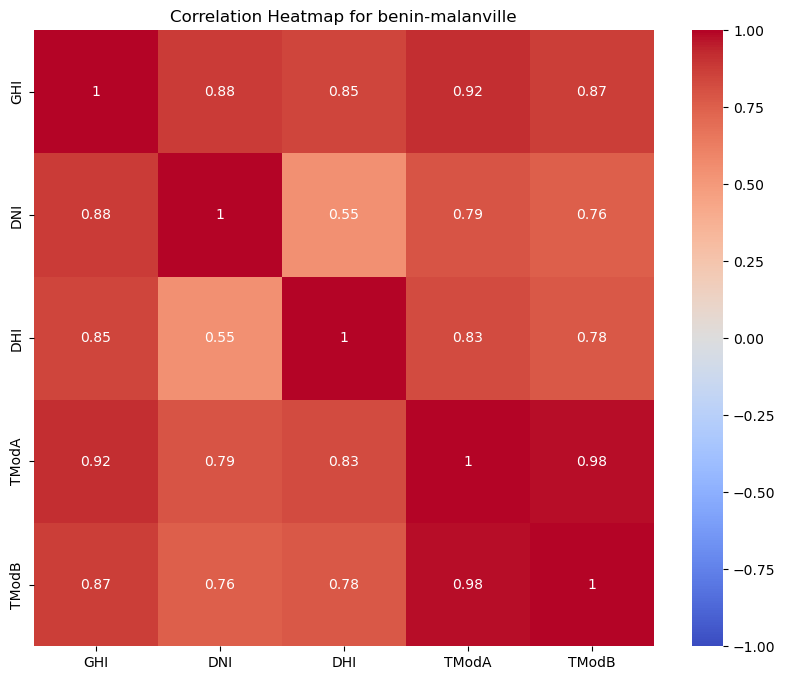

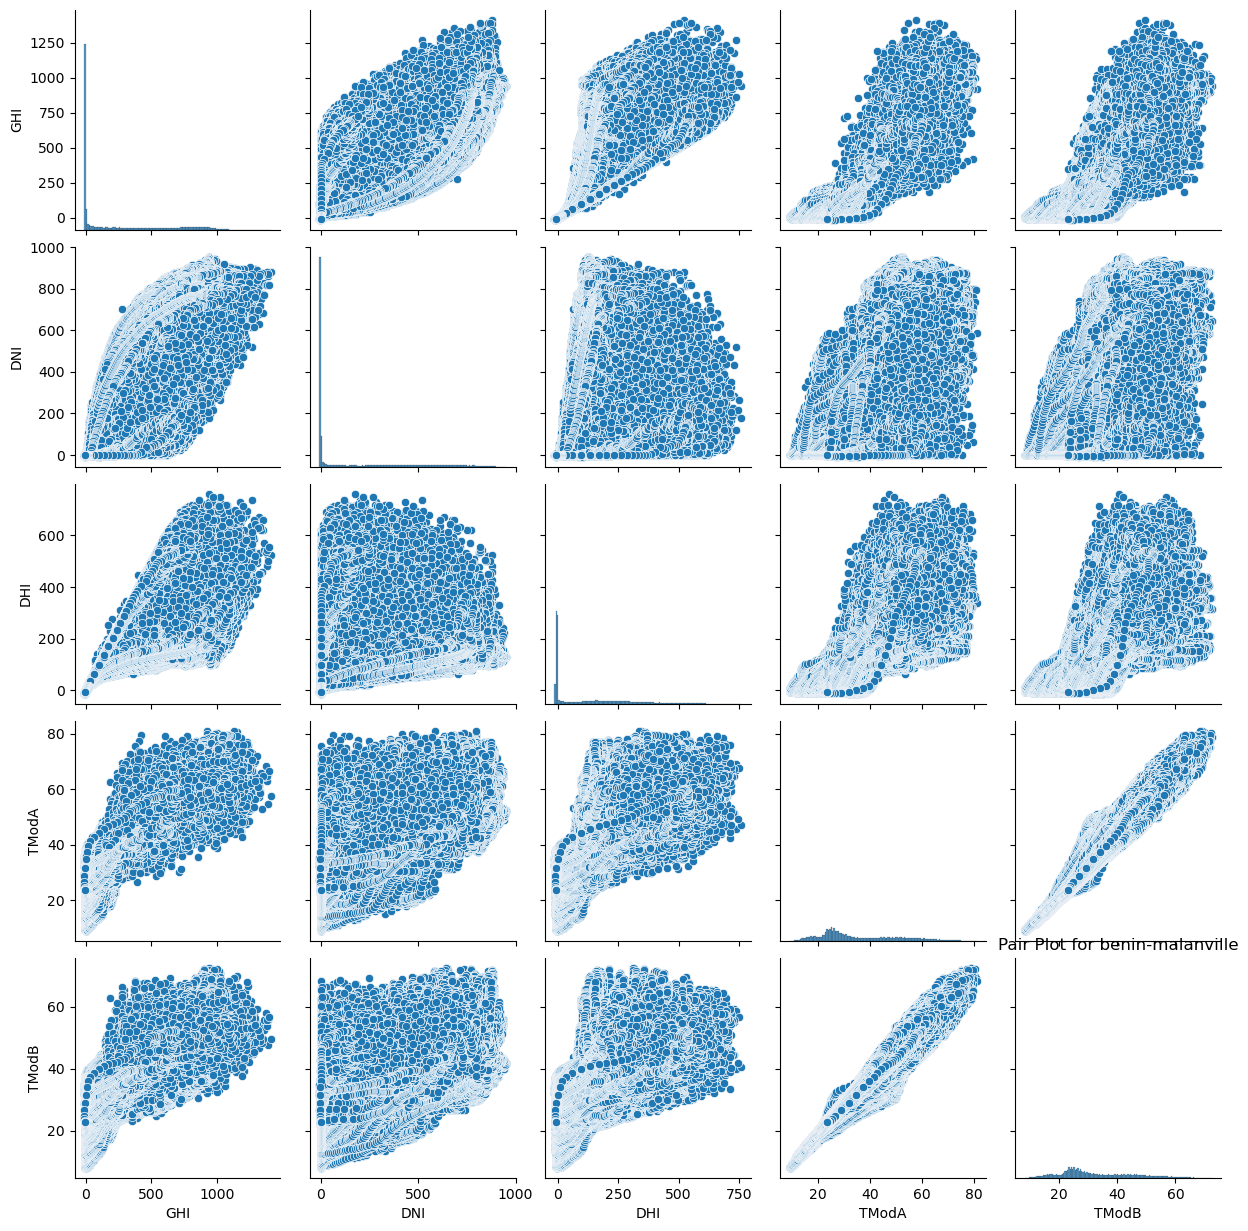

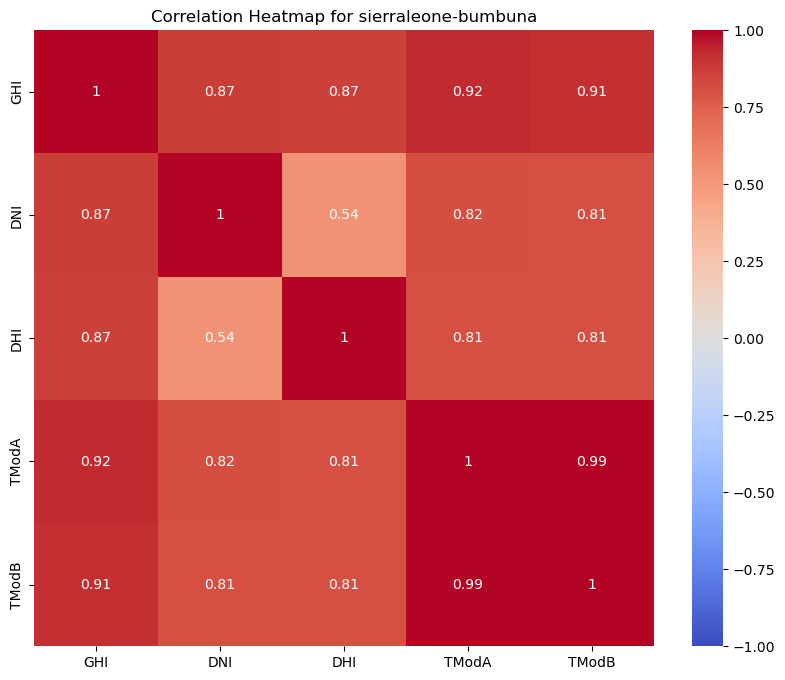

KeyboardInterrupt: 

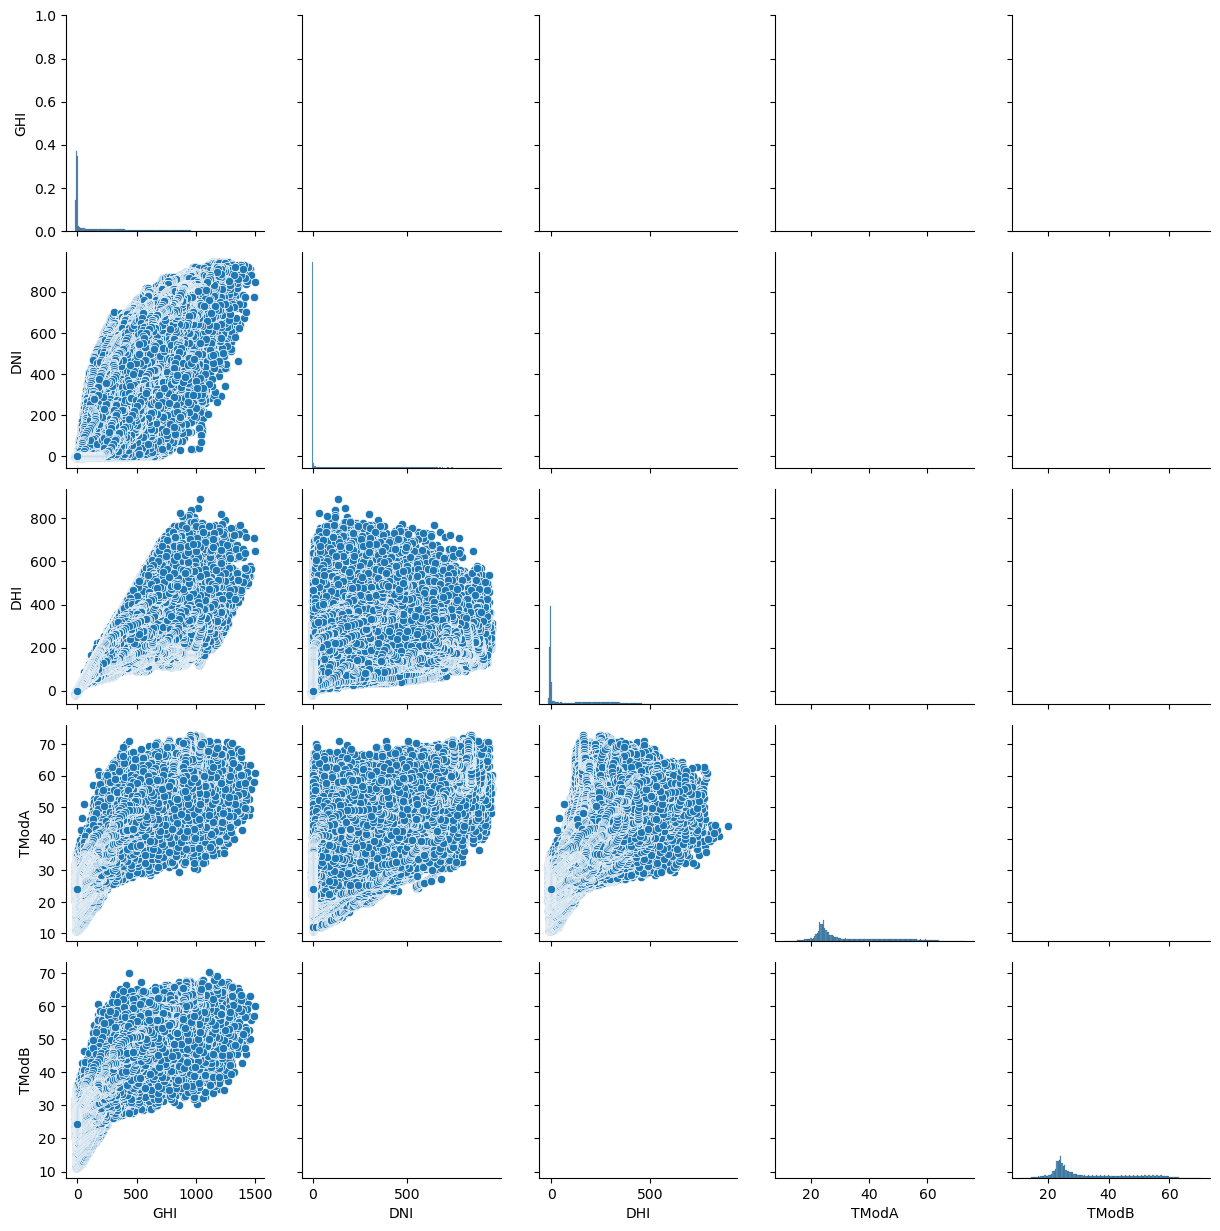

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define file paths for the saved datasets
file_paths = {
    'benin-malanville': 'benin-malanville_data.csv',
    'sierraleone-bumbuna': 'sierraleone-bumbuna_data.csv',
    'togo-dapaong_qc': 'togo-dapaong_qc_data.csv'
}

class CorrelationAndWindAnalyzer:
    def __init__(self, file_paths):
        # Load datasets
        self.dataframes = {country: pd.read_csv(path) for country, path in file_paths.items()}

    def plot_correlations(self):
        """
        Plots correlation heatmaps and pair plots for solar radiation and temperature components.
        """
        for country, df in self.dataframes.items():
            # Check if required columns are present
            required_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
            missing_columns = [col for col in required_columns if col not in df.columns]
            
            if missing_columns:
                print(f"Missing columns {missing_columns} in {country}. Skipping correlation plots.")
                continue

            # Calculate correlation matrix
            corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
            
            # Plot correlation heatmap
            plt.figure(figsize=(10, 8))
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
            plt.title(f'Correlation Heatmap for {country}')
            plt.show()

            # Plot pair plot
            sns.pairplot(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
            plt.title(f'Pair Plot for {country}')
            plt.show()

    def plot_wind_analysis(self):
        """
        Plots wind speed and direction analysis using Polar plots.
        """
        for country, df in self.dataframes.items():
            # Check if required columns are present
            if 'WS' not in df.columns or 'WD' not in df.columns:
                print(f"Missing wind columns in {country}. Skipping wind analysis.")
                continue

            # Prepare data for Polar plot
            df['WD'] = df['WD'].fillna(0)  # Fill missing values with 0
            df['WS'] = df['WS'].fillna(0)  # Fill missing values with 0

            # Convert wind direction to radians
            df['WD_rad'] = np.deg2rad(df['WD'])

            # Plot Polar plot for wind speed and direction
            plt.figure(figsize=(10, 8), dpi=100)
            ax = plt.subplot(111, projection='polar')
            c = ax.scatter(df['WD_rad'], df['WS'], c=df['WS'], cmap='viridis', alpha=0.75, s=10)
            plt.title(f'Wind Speed and Direction for {country}')
            plt.colorbar(c, label='Wind Speed')
            #plt.savefig(f"{country}_correlationandwindanalysis.png")
            plt.show()

# Create an instance of CorrelationAndWindAnalyzer
analyzer = CorrelationAndWindAnalyzer(file_paths)

# Plot correlations
analyzer.plot_correlations()

# Plot wind analysis
analyzer.plot_wind_analysis()
